In [1]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Download stock data
ticker = 'SPY'
start_date = '2018-01-01'
end_date = '2025-01-21'

tickerData = yf.Ticker(ticker)
stock_data = tickerData.history(start=start_date,  end=end_date)

stock_data.index = stock_data.index.date
stock_data.index.name = 'Date'

stock_data.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'], inplace=True)


stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,239.163353,240.029499,238.770460,239.993774,86655700
2018-01-03,240.163502,241.663652,240.163502,241.511841,90070400
2018-01-04,242.163584,243.020793,241.574245,242.529663,80636400
2018-01-05,243.333408,244.270977,242.833367,244.145981,83524000
2018-01-08,244.047734,244.753159,243.753078,244.592438,57319200


In [3]:
# Add moving averages (day = 5 days, short = 50 days, long = 200 days)
stock_data['MA_5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

#view updates df
stock_data.head()

,Open,High,Low,Close,Volume,MA_5,MA_50,MA_200
Date,,,,,,,,
2018-01-02,239.163353,240.029499,238.770460,239.993774,86655700,NaN,NaN,NaN
2018-01-03,240.163502,241.663652,240.163502,241.511841,90070400,NaN,NaN,NaN
2018-01-04,242.163584,243.020793,241.574245,242.529663,80636400,NaN,NaN,NaN
2018-01-05,243.333408,244.270977,242.833367,244.145981,83524000,NaN,NaN,NaN
2018-01-08,244.047734,244.753159,243.753078,244.592438,57319200,242.554739,NaN,NaN


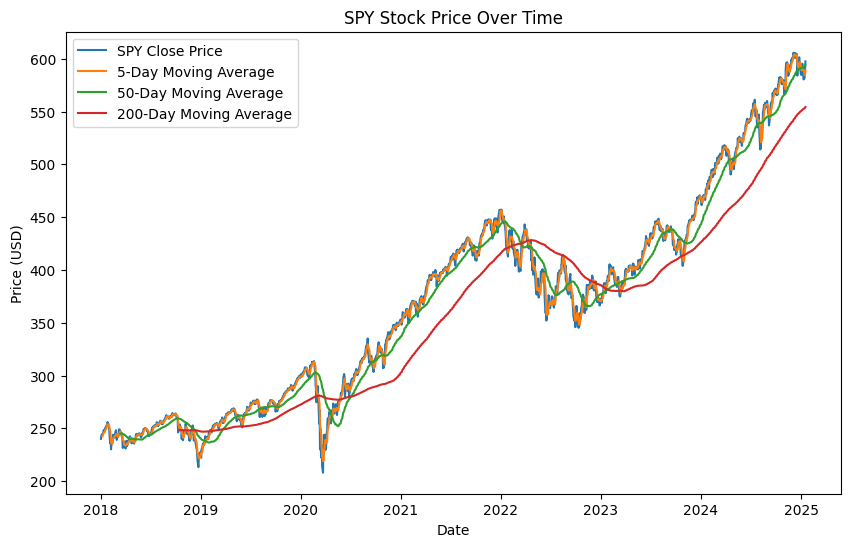

In [4]:
# Visualize stock price trends
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label=f'{ticker} Close Price')
plt.plot(stock_data['MA_5'], label='5-Day Moving Average')
plt.plot(stock_data['MA_50'], label='50-Day Moving Average')
plt.plot(stock_data['MA_200'], label='200-Day Moving Average')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Add movement classification

In [5]:
# Define the stagnation threshold (e.g., ±0.5%)
stagnation_threshold = 0.005

# Calculate the percentage change between today's close and tomorrow's close
stock_data['Pct_Change'] = stock_data['Close'].pct_change(1).shift(-1)

# Add a new column 'Movement' with encoded values
def classify_movement(change):
    if change is None or pd.isna(change):
        return None  # Keep NaN for the last day, as there's no "next day" data
    elif change > stagnation_threshold:
        return 1  # Up
    elif change < -stagnation_threshold:
        return -1  # Down
    else:
        return 0  # Stagnant

stock_data['Movement'] = stock_data['Pct_Change'].apply(classify_movement)

# Drop the 'Pct_Change' column if it's no longer needed
stock_data.drop(columns=['Pct_Change'], inplace=True)

#remove first 200 rows without MA data
stock_data.drop(stock_data.head(200).index, inplace=True)

# View the updated DataFrame
stock_data.head(20)

,Open,High,Low,Close,Volume,MA_5,MA_50,MA_200,Movement
Date,,,,,,,,,
2018-10-17,253.689462,254.331729,251.084174,253.698517,110626000,250.282657,258.999452,248.208510,-1.0
2018-10-18,252.748565,253.354667,248.741141,250.034729,134557500,251.047943,258.858808,248.251125,0.0
2018-10-19,250.695203,252.658196,249.193543,249.899139,139901600,251.102243,258.722476,248.287972,0.0
2018-10-22,250.577543,250.903191,248.234602,248.777374,82415800,251.212604,258.598110,248.311129,-1.0
2018-10-23,245.104727,248.650791,242.987909,247.510971,146352700,249.984146,258.467507,248.325722,-1.0
2018-10-24,247.257660,247.646664,239.450879,240.011734,177806700,247.246790,258.154500,248.300050,1.0
2018-10-25,241.875236,245.882662,240.834938,244.317673,138061500,246.103378,257.965795,248.297783,-1.0
2018-10-26,240.554497,245.149915,237.270751,240.020752,201574600,244.127701,257.650087,248.265103,-1.0
2018-10-29,243.159750,244.471449,235.063488,238.690964,160749100,242.110419,257.289771,248.217737,1.0


In [6]:
# Save preprocessed data
stock_data.to_csv('../data/preprocessed_stock_data.csv')

stock_data.tail()

,Open,High,Low,Close,Volume,MA_5,MA_50,MA_200,Movement
Date,,,,,,,,,
2025-01-13,575.770020,581.750000,575.349976,581.390015,47910100,587.071997,592.303767,552.911830,0.0
2025-01-14,584.359985,585.000000,578.349976,582.190002,48420600,584.438000,592.386278,553.232034,1.0
2025-01-15,590.330017,593.940002,589.200012,592.780029,56900200,585.268005,592.907227,553.605684,0.0
2025-01-16,594.169983,594.349976,590.929993,591.640015,43319700,585.698010,593.357537,553.978141,1.0
2025-01-17,596.960022,599.359985,595.609985,597.580017,58026200,589.116016,593.951165,554.396738,NaN


# Options Data

In [7]:
expiration_date = '2026-06-18'
raw_options_chain = yf.Ticker('SPY').option_chain(expiration_date)
calls_df = raw_options_chain.calls
puts_df = raw_options_chain.puts

calls_df['option_type'] = 'call'
puts_df['option_type'] = 'put'

combined_options_df = pd.concat([calls_df, puts_df], ignore_index=True)
combined_options_df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,option_type
0,SPY260618C00250000,2025-01-21 20:21:14+00:00,250.0,363.18,361.50,365.85,11.179993,3.176134,1.0,19.0,0.558842,True,REGULAR,USD,call
1,SPY260618C00255000,2024-12-16 05:11:11+00:00,255.0,341.00,357.92,362.50,0.000000,0.000000,1.0,2.0,0.568272,True,REGULAR,USD,call
2,SPY260618C00265000,2024-12-16 05:11:12+00:00,265.0,299.31,304.91,309.50,0.000000,0.000000,1.0,4.0,0.000010,True,REGULAR,USD,call
3,SPY260618C00275000,2025-01-16 17:19:04+00:00,275.0,330.42,338.00,342.73,0.000000,0.000000,2.0,3.0,0.527135,True,REGULAR,USD,call
4,SPY260618C00280000,2024-12-13 15:20:15+00:00,280.0,338.06,333.50,338.11,0.000000,0.000000,1.0,1.0,0.522008,True,REGULAR,USD,call


In [8]:
a = 585
puts = combined_options_df.query(f"option_type == 'put' and {a} < strike < 590")
puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,option_type


In [9]:
sell_strike = puts['strike'].idxmax()
sell_price = puts.loc[sell_strike]['ask']
sell_price

ValueError: attempt to get argmax of an empty sequence